# **Web Scrapping con Selenium Juego Pradera**

Asignatura: Procesamiento del Lenguaje Natural

Integrantes:
- Masciangelo Lucia
- Texier Julieta
- Rodriguez y Barros Francisco
- Cancio Jose
- Leguiza Claudia

## Introducción

### Instalación de dependencias
En esta celda, actualizamos las dependencias del sistema y luego instalamos las librerías necesarias para trabajar con Selenium:  
- **Selenium**: para la automatización de navegadores web.  
- **webdriver-manager**: para gestionar automáticamente los controladores del navegador (Chrome, en este caso).

In [ ]:
# 📦 Instalar dependencias
!apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:11 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [77.5 kB]
Get:12 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,659 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu 

In [ ]:
!pip install -q selenium webdriver-manager

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 20.8 MB/s eta 0:00:00


### Configuración del entorno y opciones para Selenium
En esta celda:
1. Importamos las librerías necesarias de Selenium y otras utilidades.
2. Configuramos opciones del navegador Chrome:
   - **--headless**: ejecuta Chrome sin interfaz gráfica.
   - **--no-sandbox**: evita restricciones de seguridad en entornos virtualizados.
   - **--disable-dev-shm-usage**: mejora la gestión de memoria compartida en Docker.
3. Especificamos la ruta al controlador de Chrome.

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

# Configuración más detallada de las opciones de Chrome
chrome_options = Options()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('user-agent=Mozilla/5.0 (Linux; Android 6.0; Nexus 5 Build/MRA58N) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/134.0.0.0 Mobile Safari/537.36')  # Establecer el User-Agent

In [ ]:
# FUNCION PARA INICIAR EL DRIVER DE SELENIUM

In [ ]:
def iniciar_driver():
    # ✅ Configurar la ruta del driver
    service = Service('/usr/bin/chromedriver')
    # # Inicializar el webdriver
    driver = webdriver.Chrome(options=chrome_options)
    return driver

### **Extraer la descripcion general del juego**

In [ ]:
def obtener_descripcion_meadow(delay=5):

    descripcion_general= []
    try:
        driver = iniciar_driver()
        # Inicializar el webdriver
        url = "https://boardgamegeek.com/boardgame/314491/meadow"
        driver.get(url)

        print(f"⏳ Esperando {delay} segundos para que cargue el contenido...")
        time.sleep(delay)

        # 👉 Hacer clic en el botón "+ Más" si está presente
        try:
            boton_mas = WebDriverWait(driver, 5).until(
                EC.element_to_be_clickable((By.CSS_SELECTOR, "div.opener a"))
            )
            boton_mas.click()
            print("🔓 Se expandió la descripción.")
            time.sleep(1)  # pequeño delay para que cargue lo expandido
        except:
            print("ℹ️ No se encontró botón '+ Más'. Probablemente ya está expandido.")

        # 🔍 Buscar todos los párrafos de la descripción
        parrafos = driver.find_elements(By.CSS_SELECTOR, "article.game-description-body p")

        if parrafos:
            print("📝 Descripción de 'Meadow':\n")
            for p in parrafos:
                print(p.text.strip())
                descripcion_general.append(p.text.strip())
        else:
            print("⚠ No se encontró la descripción del juego.")

    finally:
        driver.quit()

    return descripcion_general


In [ ]:
# SCRIPT PARA GUARDAR LA DESCRIPCION GENERAL DEL JUEGO EN ARCHIVO .TXT

import os

from google.colab import drive
drive.mount('/content/drive/')

# Nombre del archivo para guardar los enlaces
nombre_archivo = 'descripcion_general.txt'

# Acceso a la carpeta compartida en MyDrive
directorio_guardado = f'/content/drive/My Drive/PRADERA/datos/informacion'
os.makedirs(directorio_guardado, exist_ok=True)

# Construir la ruta completa del archivo
ruta_completa = os.path.join(directorio_guardado, nombre_archivo)

# Ejecutar
descripcion_general= obtener_descripcion_meadow()

# Abrir el archivo en modo escritura
with open(ruta_completa, 'w') as archivo:
    archivo.write('\n'.join(descripcion_general))

print(f"Descripcion general guardada en {ruta_completa}")


Mounted at /content/drive/
⏳ Esperando 5 segundos para que cargue el contenido...
🔓 Se expandió la descripción.
📝 Descripción de 'Meadow':

Meadow is an engaging set collection game with over two hundred unique cards containing hand-painted watercolor illustrations. In the game, players take the role of explorers competing for the title of the most skilled nature observer. To win, they collect cards with the most valuable species, landscapes, and discoveries. Their journey is led by passion, a curiosity of the world, an inquiring mind, and a desire to discover the mysteries of nature. The competition continues at the bonfire where the players race to fulfill the goals of their adventures.
In this medium-weight board game for 1-4 players, you take turns placing path tokens on one of the two boards. Placing a token on the main board allows the player to get cards, but playing them requires meeting certain requirements. Playing a token on the bonfire board activates special actions (which

### **Extraer la Informacion del juego**

In [ ]:
import pandas as pd

def obtener_nombre_y_anio(driver):
    titulo = driver.find_element(By.CSS_SELECTOR, "h1 > a > span").text
    anio = driver.find_element(By.CSS_SELECTOR, ".game-year").text.strip("()")
    return titulo, anio

def obtener_imagen(driver):
    imagen = driver.find_element(By.CSS_SELECTOR, ".game-header-image img").get_attribute("src")
    return imagen

def obtener_descripcion_corta(driver):
    try:
        return driver.find_element(By.CSS_SELECTOR, "p[ng-if*='short_description'] span").text
    except:
        return None

def obtener_datos_gameplay(driver):
    items = driver.find_elements(By.CSS_SELECTOR, ".gameplay-item-primary")
    datos = [item.text.strip() for item in items]
    return datos  # Ej: ["1–4 Players", "60–90 Min", "Age: 10+", "Weight: 2.25 / 5"]

def obtener_creditos(driver):
    creditos = {}
    # Obtenemos el nombre primario del juego
    creditos["nombre_primario"]= driver.find_elements(By.CSS_SELECTOR, "div.outline-item-description")[0].text

    # Obtenemos el nombre alternativo del juego
    credito_nom_alt= driver.find_elements(By.XPATH, "//*[@id='mainbody']/div[2]/div/div[2]/div[2]/ng-include/div/div/ui-view/ui-view/div/div/div[2]/credits-module/ul/li[2]/div[2]/div/div")
    for nombre_alt in credito_nom_alt:
         creditos["nombre_alternativo"] = (nombre_alt.text).split("\n")

    # Obtenemos el año del release del juego
    creditos["anio_release"]= driver.find_element(By.XPATH, "//*[@id='mainbody']/div[2]/div/div[2]/div[2]/ng-include/div/div/ui-view/ui-view/div/div/div[2]/credits-module/ul/li[3]/div[2]").text

    # Obtenemos el nombre del diseñador del juego
    creditos["diseñador"]= driver.find_element(By.XPATH, "//*[@id='mainbody']/div[2]/div/div[2]/div[2]/ng-include/div/div/ui-view/ui-view/div/div/div[2]/credits-module/ul/li[4]/div[2]/div/div/a").text

    # Obtenemos el nombre del ilustrador del juego
    ilustrador_text = driver.find_element(By.XPATH, "//*[@id='mainbody']/div[2]/div/div[2]/div[2]/ng-include/div/div/ui-view/ui-view/div/div/div[2]/credits-module/ul/li[6]/div[2]/div").text
    creditos["ilustrador"] = ilustrador_text.split("\n", maxsplit=1)

    # Obtenemos el nombre de las editoriales del juego
    editor_text = driver.find_element(By.XPATH, "//*[@id='mainbody']/div[2]/div/div[2]/div[2]/ng-include/div/div/ui-view/ui-view/div/div/div[2]/credits-module/ul/li[7]/div[2]/div").text
    creditos["editoriales"] = editor_text.split("\n")

    # Obtenemos el nombre del desarrollador del juego
    desarrollador_text = driver.find_element(By.XPATH, "//*[@id='mainbody']/div[2]/div/div[2]/div[2]/ng-include/div/div/ui-view/ui-view/div/div/div[2]/credits-module/ul/li[4]/div[2]").text
    creditos["desarrollador"] = desarrollador_text.split("\n")

    # Obtenemos el nombre del diseñador grafico del juego
    diseñador_grafico_text = driver.find_element(By.XPATH, "//*[@id='mainbody']/div[2]/div/div[2]/div[2]/ng-include/div/div/ui-view/ui-view/div/div/div[2]/credits-module/ul/li[9]/div[2]").text
    creditos["diseñadorgrafico"] = diseñador_grafico_text.split("\n")

    # Obtenemos el nombre del editor del juego
    editor_text = driver.find_element(By.XPATH, "//*[@id='mainbody']/div[2]/div/div[2]/div[2]/ng-include/div/div/ui-view/ui-view/div/div/div[2]/credits-module/ul/li[11]/div[2]").text
    creditos["editor"] = editor_text.split("\n")

    # Obtenemos el nombre del escritor del juego
    creditos["escritor"] = driver.find_element(By.XPATH, "//*[@id='mainbody']/div[2]/div/div[2]/div[2]/ng-include/div/div/ui-view/ui-view/div/div/div[2]/credits-module/ul/li[12]/div[2]/div/div/a").text

    # Obtenemos las categorias del juego
    categoria_text = driver.find_element(By.XPATH, "//*[@id='mainbody']/div[2]/div/div[2]/div[2]/ng-include/div/div/ui-view/ui-view/div/div/div[2]/credits-module/ul/li[14]/div[2]/div").text
    creditos["categoria"] = categoria_text.split("\n")

    # Obtenemos los mecanismos del juego
    mecanismos_text = driver.find_element(By.XPATH, "//*[@id='mainbody']/div[2]/div/div[2]/div[2]/ng-include/div/div/ui-view/ui-view/div/div/div[2]/credits-module/ul/li[15]/div[2]").text
    creditos["mecanismo"] = mecanismos_text.split("\n")

    # Obtenemos la familia a las que pertenece el juego
    familia_text = driver.find_element(By.XPATH, "//*[@id='mainbody']/div[2]/div/div[2]/div[2]/ng-include/div/div/ui-view/ui-view/div/div/div[2]/credits-module/ul/li[16]/div[2]/div").text
    creditos["familia"] = familia_text.split("\n")
    return creditos

def obtener_rankings(driver):
    rankings = {}
    for ul in driver.find_elements(By.CSS_SELECTOR, "ul.ranks"):
        tipo = ul.find_element(By.CLASS_NAME, "rank-title").text
        valor = ul.find_element(By.CLASS_NAME, "rank-number").text.strip()
        rankings[tipo] = valor
    return rankings

def extraer_info_completa(url):
    # Inicializar el webdriver
    driver = iniciar_driver()
    driver.get(url)
    WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "h1")))

    info = {}
    info["nombre"], info["año"] = obtener_nombre_y_anio(driver)
    info["imagen"] = obtener_imagen(driver)
    info["descripcion_corta"] = obtener_descripcion_corta(driver)
    info["gameplay"] = obtener_datos_gameplay(driver)
    info["rankings"] = obtener_rankings(driver)

    driver.quit()

    # Obtenemos los creditos del juego con otra URL
    driver = iniciar_driver()
    driver.get(url + "/credits")
    time.sleep(2)
    info["creditos"] = obtener_creditos(driver)

    # Crear un DataFrame de pandas con la info de "Creditos" para sacar relaciones
    creditos_df = pd.DataFrame(list(info["creditos"].items()), columns=['Clave', 'Valor'])
    # Use list() to convert the items view to a list and specify column names directly

    # Guardar en archivo .CSV los creditos del juego para su uso posterior
    creditos_df.to_csv('creditos.csv', index=False)

    driver.quit()
    return info

In [ ]:
# PROBAMOS Y VERIFICAMOS EL RESULTADO DE INFO OBTENIDA
info_juego= extraer_info_completa("https://boardgamegeek.com/boardgame/314491/meadow")
info_juego

{'nombre': 'Meadow',
 'año': '2021',
 'imagen': 'https://cf.geekdo-images.com/9r3qdPijtgoIN24PxFU2gw__itemrep/img/1yJh57jtXEq12EZ2eBBN9q5b71I=/fit-in/246x300/filters:strip_icc()/pic5894745.jpg',
 'descripcion_corta': 'Start your journey into nature and collect cards to become a true nature observer.',
 'gameplay': ['1–4 Players',
  '60–90 Min',
  'Age: 10+',
  'Weight: 2.25 / 5\nComplexity Rating'],
 'rankings': {'OVERALL': '209', 'STRATEGY': '158', 'FAMILY': '28'},
 'creditos': {'nombre_primario': 'Meadow',
  'nombre_alternativo': ['Łąka',
   'Livada',
   'Meadow Im Reich der Natur',
   'Na louce',
   'Pradera',
   'Zöldellő Mezők',
   'Левада',
   'Поляна',
   'メドウ',
   '芳野寻踪',
   '메도우'],
  'anio_release': '2021',
  'diseñador': 'Klemens Kalicki',
  'ilustrador': ['Karolina Kijak', 'Katarzyna Fiebiger'],
  'editoriales': ['Rebel Studio',
   'ADC Blackfire Entertainment',
   'Arclight Games',
   'Galápagos Jogos',
   'Games4you',
   'Gém Klub Kft.',
   'Hobby Game Mall',
   'Hobby Wor

In [ ]:
# SCRIPT PARA GUARDAR LA INFO DEL JUEGO EN ARCHIVO .TXT

import os

from google.colab import drive
drive.mount('/content/drive/')

# Nombre del archivo para guardar los enlaces
nombre_archivo = 'info_juego.txt'

# Acceso a la carpeta compartida en MyDrive
directorio_guardado = f'/content/drive/My Drive/PRADERA/datos/informacion'
os.makedirs(directorio_guardado, exist_ok=True)

# Construir la ruta completa del archivo
ruta_completa = os.path.join(directorio_guardado, nombre_archivo)

# Ejecutar
info_extraida= extraer_info_completa("https://boardgamegeek.com/boardgame/314491/meadow")

# Abrir el archivo en modo escritura
with open(ruta_completa, 'w', encoding='utf-8') as archivo:
    for clave, valor in info_extraida.items():
        if isinstance(valor, list):  # Checkear si el valor es una lista de elementos
            # Unir elementos de la lista con comas si es una lista
            valor_str = ', '.join(valor)
        else:
            valor_str = str(valor)  # Convertir el contenido de valor a string

        # Escribir clave y valor al archivo
        archivo.write(f"{clave}: {valor_str}\n")

print(f"Informacion del juego guardada en {ruta_completa}")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Informacion del juego guardada en /content/drive/My Drive/PRADERA/datos/informacion/info_juego.txt


###  **Extraer el contenido de lo foros del juego**

In [ ]:
# OBTENER TEXTO DEL FORO "REVIEWS" DEL JUEGO

In [ ]:
driver= iniciar_driver()
foros = {} # Diccionario donde se almacenan los titulos de cada articulo del foro y el texto respectivo
url = "https://boardgamegeek.com/boardgame/314491/meadow/forums/63"  # FORO DE REVIEWS (RESEÑAS)
driver.get(url)

# Esperar hasta que los elementos estén presentes
WebDriverWait(driver, 20).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.summary-item-title")))

# Obtenemos los titulos de las reseñas del foro REVIEWS del juego
titulos_foros = driver.find_elements(By.CSS_SELECTOR, "div.summary-item-title")

# Iteramos sobre cada título de foro para obtener el enlace y el texto
for titulo in titulos_foros:
    enlaces = titulo.find_elements(By.TAG_NAME, "a")  # Encontrar todos los elementos "a" dentro del titulo

    if len(enlaces) >= 2:  # Verificar si hay al menos 2 elementos "a"
        enlace = enlaces[1]  # Obtener el segundo elemento "a"
        texto_foro = enlace.text.strip()  # Obtenemos el texto del enlace
        url_foro = enlace.get_attribute("ng-href")  # Obtenemos la URL del enlace
        #print(texto_foro) # Vemos el titulo del articulo
        #print(url_foro)   # Vemos el link del articulo

        # Navegamos al foro indicado por la URL anterior
        driver= iniciar_driver()
        # Construimos la URL completaL
        base_url = "https://boardgamegeek.com"
        full_url_foro = base_url + url_foro
        driver.get(full_url_foro)

        # Esperamos a que se cargue la pagina
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "h1")))

        # Scroll hasta la parte inferior de la pagina
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Esperar unos segundos para permitir que se cargue el contenido dinamico de la pagina
        time.sleep(5)

        # Obtener trodos los elementos con "gg-article" (que contienen los post de cada articulo)
        articulos = driver.find_elements(By.XPATH, "//*[@id='mainbody']/div/div/gg-thread-container/gg-thread/gg-articles/gg-articles-ui/section/gg-article/gg-post/article/div")

        texto_reseña = ""

        # Itera a través de cada artículo y agrega el texto a texto_reseña
        for articulo in articulos:
            texto_reseña += articulo.text + "\n"

        # Vemos la reseña
        print(f"Reseña de '{texto_foro}")
        print(texto_reseña.replace('\n', ''))

        # Almacenamos la reseña en el diccionario
        foros[texto_foro] = texto_reseña

driver.quit()

Reseña de 'Overview & Thoughts
Despite loving what I think is a stoat on the cover of Meadow, I don't think it does justice to how beautiful everything in the box is. This card-drafting game is filled with over 200 hand-painted and frame-worthy illustrations. While trying not to be distracted by the card art, you'll be collecting flora, fauna, and landscapes to build a tableau that's better than your opponents (and maybe sometimes just picking the cards you think are the cutest, because how am I supposed to pass up a badger?).Meadow is played over a set number of rounds (by player count), with five turns each round denoted by path tokens. Each path token has a number on one end and a bonus action on the other. You choose which of the two you want to use:The number end allows you to draft a card from the corresponding row or column of the central board. After drafting, you can choose to play a card to your tableau (some cards require specific terrain types or previously played cards).Th

In [ ]:
# SCRIPT PARA GUARDAR LAS RESEÑAS DEL FORO "REVIEWS" DEL JUEGO EN ARCHIVO .TXT
import os

from google.colab import drive
drive.mount('/content/drive/')

# Nombre del archivo para guardar los enlaces
nombre_archivo = 'foro_reviews.txt'

# # Acceso a la carpeta compartida en MyDrive
directorio_guardado = f'/content/drive/My Drive/PRADERA/datos/informacion'
os.makedirs(directorio_guardado, exist_ok=True)

# Construir la ruta completa del archivo
ruta_completa = os.path.join(directorio_guardado, nombre_archivo)

# Abrir el archivo en modo escritura
with open(ruta_completa, 'w', encoding='utf-8') as archivo:
    for clave, valor in foros.items():
        # Escribir clave y valor al archivo
        archivo.write(f"{clave}: {valor}\n")

print(f"Foro 'Reviews' guardado en {ruta_completa}")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Foro 'Reviews' guardado en /content/drive/My Drive/PRADERA/datos/informacion/foro_reviews.txt


In [ ]:
# OBTENER TEXTO DEL FORO "GENERAL" DEL JUEGO

In [ ]:
driver= iniciar_driver()
foros = {} # Diccionario donde se almacenan los titulos de cada articulo del foro y el texto respectivo
url = "https://boardgamegeek.com/boardgame/314491/meadow/forums/65"  # FORO GENERAL
driver.get(url)

# Esperar hasta que los elementos estén presentes
WebDriverWait(driver, 20).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.summary-item-title")))

# Obtenemos los titulos de las reseñas del foro GENERAL del juego
titulos_foros = driver.find_elements(By.CSS_SELECTOR, "div.summary-item-title")

# Iteramos sobre cada título de foro para obtener el enlace y el texto
for titulo in titulos_foros:
    enlaces = titulo.find_elements(By.TAG_NAME, "a")  # Encontrar todos los elementos "a" dentro del titulo

    if len(enlaces) >= 2:  # Verificar si hay al menos 2 elementos "a"
        enlace = enlaces[1]  # Obtener el segundo elemento "a"
        texto_foro = enlace.text.strip()  # Obtenemos el texto del enlace
        url_foro = enlace.get_attribute("ng-href")  # Obtenemos la URL del enlace
        #print(texto_foro) # Vemos el titulo del articulo
        #print(url_foro)   # Vemos el link del articulo

        # Navegamos al foro indicado por la URL anterior
        driver= iniciar_driver()
        # Construios la URL completaL
        base_url = "https://boardgamegeek.com"
        full_url_foro = base_url + url_foro
        driver.get(full_url_foro)

        # Esperamos a que se cargue la pagina
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "h1")))

        # Scroll hasta la parte inferior de la pagina
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Esperar unos segundos para permitir que se cargue el contenido dinamico de la pagina
        time.sleep(5)

        # Obtener trodos los elementos con "gg-article" (que contienen los post de cada articulo)
        articulos = driver.find_elements(By.XPATH, "//*[@id='mainbody']/div/div/gg-thread-container/gg-thread/gg-articles/gg-articles-ui/section/gg-article/gg-post/article/div")

        texto_reseña = ""

        # Itera a través de cada artículo y agrega el texto a texto_reseña
        for articulo in articulos:
            texto_reseña += articulo.text + "\n"

        # Vemos la reseña
        print(f"Reseña de '{texto_foro}")
        print(texto_reseña.replace('\n', ''))

        # Almacenamos la reseña en el diccionario
        foros[texto_foro] = texto_reseña

driver.quit()

Reseña de 'Missed card packs ?
Hello everyoneAfter checking my collection, I do not find some packs.I have not got the card envelopes from E to L and V.Do they exist ?Thanks for every information about themHave a nice dayHi,Two years ago, I have created an excel file with all cards from base game, extensions and promos cards.You will find it here.The cards from Meadow adventure book are missing (M01 to M74 cards), but this should be complete.There is no index from E to L cards, nor V cards.Thanks for your answer.
Reseña de 'All content in one box?
Is there any insert to fit the base game and both expansions in one box? (I don't have the adventure box, only base + downstream fitting in the base box).It's not possible without serious lid lift. I don't even think it's possible to fit everything in the base game box when ditching the base game insert and the individual scenario storage boxes in the Adventure Book expansion and just using baggies.Base + adventure book into the base box is p

In [ ]:
# SCRIPT PARA GUARDAR LAS RESEÑAS DEL FORO "GENERAL" DEL JUEGO EN ARCHIVO .TXT
import os

from google.colab import drive
drive.mount('/content/drive/')

# Nombre del archivo para guardar los enlaces
nombre_archivo = 'foro_general.txt'

# # Acceso a la carpeta compartida en MyDrive
directorio_guardado = f'/content/drive/My Drive/PRADERA/datos/informacion'

# Construir la ruta completa del archivo
ruta_completa = os.path.join(directorio_guardado, nombre_archivo)

# Abrir el archivo en modo escritura
with open(ruta_completa, 'w', encoding='utf-8') as archivo:
    for clave, valor in foros.items():
        # Escribir clave y valor al archivo
        archivo.write(f"{clave}: {valor}\n")

print(f"Foro 'General' guardado en {ruta_completa}")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Foro 'General' guardado en /content/drive/My Drive/PRADERA/datos/informacion/foro_general.txt


In [ ]:
# OBTENER TEXTO DEL FORO "RULES" DEL JUEGO

In [ ]:
driver= iniciar_driver()
foros = {} # Diccionario donde se almacenan los titulos de cada articulo del foro y el texto respectivo
url = "https://boardgamegeek.com/boardgame/314491/meadow/forums/66"  # FORO REGLAS
driver.get(url)

# Esperar hasta que los elementos estén presentes
WebDriverWait(driver, 20).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.summary-item-title")))

# Obtenemos los titulos de las reseñas del foro RULES del juego
titulos_foros = driver.find_elements(By.CSS_SELECTOR, "div.summary-item-title")

# Iteramos sobre cada título de foro para obtener el enlace y el texto
for titulo in titulos_foros:
    enlaces = titulo.find_elements(By.TAG_NAME, "a")  # Encontrar todos los elementos "a" dentro del titulo

    if len(enlaces) >= 2:  # Verificar si hay al menos 2 elementos "a"
        enlace = enlaces[1]  # Obtener el segundo elemento "a"
        texto_foro = enlace.text.strip()  # Obtenemos el texto del enlace
        url_foro = enlace.get_attribute("ng-href")  # Obtenemos la URL del enlace
        #print(texto_foro) # Vemos el titulo del articulo
        #print(url_foro)   # Vemos el link del articulo

        # Navegamos al foro indicado por la URL anterior
        driver= iniciar_driver()
        # Construios la URL completaL
        base_url = "https://boardgamegeek.com"
        full_url_foro = base_url + url_foro
        driver.get(full_url_foro)

        # Esperamos a que se cargue la pagina
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "h1")))

        # Scroll hasta la parte inferior de la pagina
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Esperar unos segundos para permitir que se cargue el contenido dinamico de la pagina
        time.sleep(5)

        # Obtener trodos los elementos con "gg-article" (que contienen los post de cada articulo)
        articulos = driver.find_elements(By.XPATH, "//*[@id='mainbody']/div/div/gg-thread-container/gg-thread/gg-articles/gg-articles-ui/section/gg-article/gg-post/article/div")

        texto_reseña = ""

        # Itera a través de cada artículo y agrega el texto a texto_reseña
        for articulo in articulos:
            texto_reseña += articulo.text + "\n"

        # Vemos la reseña
        print(f"Reseña de '{texto_foro}")
        print(texto_reseña.replace('\n', ''))

        # Almacenamos la reseña en el diccionario
        foros[texto_foro] = texto_reseña

driver.quit()

Reseña de 'Ungulate Rule
Can someone tell me why the ungulate cards can't have cards placed on them? In a game where every card's placement requirements makes perfect thematic sense, the ungulate rule stands out in having this seemingly arbitrary rule that doesn't fit thematically. I can't see that it's a balance issue - they aren't worth enough points to warrant shutting down a whole column as far as we can tell -and after some test games ignoring the rule, we've decided to to house rule it for all future games that playing on top of an ungulate card is fair game. I'm not looking for validation of our house rule; I'm just having a hard time believing the creators of a game with such a fantastically intuitive, well-integrated theme would have made such a rule for the ungulate cards without having had in mind some thematic rationale behind it, and I'd like to know what that rationale was, or if it is merely a balancing rule or somesuch that I'm undervaluing.The cards are referred to as 

In [ ]:
# SCRIPT PARA GUARDAR LAS RESEÑAS DEL FORO "RULES" DEL JUEGO EN ARCHIVO .TXT
import os

from google.colab import drive
drive.mount('/content/drive/')

# Nombre del archivo para guardar los enlaces
nombre_archivo = 'foro_reglas.txt'

# # Acceso a la carpeta compartida en MyDrive
directorio_guardado = f'/content/drive/My Drive/PRADERA/datos/informacion'

# Construir la ruta completa del archivo
ruta_completa = os.path.join(directorio_guardado, nombre_archivo)

# Abrir el archivo en modo escritura
with open(ruta_completa, 'w', encoding='utf-8') as archivo:
    for clave, valor in foros.items():
        # Escribir clave y valor al archivo
        archivo.write(f"{clave}: {valor}\n")

print(f"Foro 'Reglas' guardado en {ruta_completa}")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Foro 'Reglas' guardado en /content/drive/My Drive/PRADERA/datos/informacion/foro_reglas.txt


In [ ]:
# OBTENER TEXTO DEL FORO "VARIANTS" DEL JUEGO

In [ ]:
driver= iniciar_driver()
foros = {} # Diccionario donde se almacenan los titulos de cada articulo del foro y el texto respectivo
url = "https://boardgamegeek.com/boardgame/314491/meadow/forums/69"  # FORO VARIANTES
driver.get(url)

# Esperar hasta que los elementos estén presentes
WebDriverWait(driver, 20).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.summary-item-title")))

# Obtenemos los titulos de las reseñas del foro VARIANTS del juego
titulos_foros = driver.find_elements(By.CSS_SELECTOR, "div.summary-item-title")

# Iteramos sobre cada título de foro para obtener el enlace y el texto
for titulo in titulos_foros:
    enlaces = titulo.find_elements(By.TAG_NAME, "a")  # Encontrar todos los elementos "a" dentro del titulo

    if len(enlaces) >= 2:  # Verificar si hay al menos 2 elementos "a"
        enlace = enlaces[1]  # Obtener el segundo elemento "a"
        texto_foro = enlace.text.strip()  # Obtenemos el texto del enlace
        url_foro = enlace.get_attribute("ng-href")  # Obtenemos la URL del enlace
        #print(texto_foro) # Vemos el titulo del articulo
        #print(url_foro)   # Vemos el link del articulo

        # Navegamos al foro indicado por la URL anterior
        driver= iniciar_driver()
        # Construios la URL completaL
        base_url = "https://boardgamegeek.com"
        full_url_foro = base_url + url_foro
        driver.get(full_url_foro)

        # Esperamos a que se cargue la pagina
        WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, "h1")))

        # Scroll hasta la parte inferior de la pagina
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

        # Esperar unos segundos para permitir que se cargue el contenido dinamico de la pagina
        time.sleep(5)

        # Obtener trodos los elementos con "gg-article" (que contienen los post de cada articulo)
        articulos = driver.find_elements(By.XPATH, "//*[@id='mainbody']/div/div/gg-thread-container/gg-thread/gg-articles/gg-articles-ui/section/gg-article/gg-post/article/div")

        texto_reseña = ""

        # Itera a través de cada artículo y agrega el texto a texto_reseña
        for articulo in articulos:
            texto_reseña += articulo.text + "\n"

        # Vemos la reseña
        print(f"Reseña de '{texto_foro}")
        print(texto_reseña.replace('\n', ''))

        # Almacenamos la reseña en el diccionario
        foros[texto_foro] = texto_reseña

driver.quit()

Reseña de 'Cooperative?
Has anyone posted coop rules somewhere? I was trying to think of how to play this with my son against Rover. However, Rover is already too easy. We played solo together and had fun, but we each want our own tableau.
Reseña de 'Improving Solo Variants with a Win Condition (Inspired by Targi)
Hello everyone!!!I’d like to share an idea to enhance the solo mode of the game by introducing a win condition, inspired by the game Targi.Why Try This:* Adds a strategic direction from the start* Introduces an extra tactical layer to each playthrough* Keeps solo mode fresh and challengingSet Up:You will need 1 D6 die. Roll it once before the game starts to determine the win condition:* Normal mode: roll 3 conditions (I, II, III)* Hard mode: roll 4 conditions (I, II, III-1, III-2)Before scoring at the end of the game, the player must meet a specific icon requirement (win condition).Ignore Starting card!* If the condition is fulfilled, proceed to scoring and compare points wit

In [ ]:
# SCRIPT PARA GUARDAR LAS RESEÑAS DEL FORO "VARIANTS" DEL JUEGO EN ARCHIVO .TXT
import os

from google.colab import drive
drive.mount('/content/drive/')

# Nombre del archivo para guardar los enlaces
nombre_archivo = 'foro_variantes.txt'

# # Acceso a la carpeta compartida en MyDrive
directorio_guardado = f'/content/drive/My Drive/PRADERA/datos/informacion'

# Construir la ruta completa del archivo
ruta_completa = os.path.join(directorio_guardado, nombre_archivo)

# Abrir el archivo en modo escritura
with open(ruta_completa, 'w', encoding='utf-8') as archivo:
    for clave, valor in foros.items():
        # Escribir clave y valor al archivo
        archivo.write(f"{clave}: {valor}\n")

print(f"Foro 'Variantes' guardado en {ruta_completa}")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
Foro 'Variantes' guardado en /content/drive/My Drive/PRADERA/datos/informacion/foro_variantes.txt


###  **Extraer las estadisticas del juego**

In [ ]:
import pandas as pd

driver= iniciar_driver()
stats = {} # Diccionario donde se almacenan las estadisticas y su valor
# URL de la página que contiene las estadisticas del juego
url = 'https://boardgamegeek.com/boardgame/314491/meadow/stats'  # ESTADISTICAS
driver.get(url)

# Esperar hasta que los elementos estén presentes
WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "div.col-sm-pull-6")))

# Obtenemos las estadisticas del juego
stats_groups = driver.find_elements(By.CSS_SELECTOR, "div.col-sm-pull-6")
for group in stats_groups:
    # Buscamos los "outline-item" dentro del grupo
    outline_items = group.find_elements(By.CSS_SELECTOR, "li.outline-item")
    # Iteramos sobre cada estadistica del juego para obtener su nombre y el valor
    for stats_group in outline_items:
        nom_estadistica = stats_group.find_element(By.CSS_SELECTOR, "div.outline-item-title").text
        valor_elementos = stats_group.find_elements(By.CSS_SELECTOR, "a.ng-binding")
        if valor_elementos:
            valor_estadistica = valor_elementos[0].text
        else:
            valor_estadistica = stats_group.find_element(By.CSS_SELECTOR, "div.outline-item-description").text
        stats[nom_estadistica] = valor_estadistica

# Crear un DataFrame de pandas
stats_df = pd.DataFrame((stats.items()), columns=['Estadistica', 'Valor'])
print(stats_df)

driver.quit()

       Estadistica     Valor
0      Avg. Rating     7.719
1   No. of Ratings    12,201
2   Std. Deviation      1.22
3           Weight  2.25 / 5
4         Comments     1,861
5             Fans     1,164
6       Page Views   983,188
7     Overall Rank       209
8    Strategy Rank       158
9      Family Rank        28
10  All Time Plays    50,530
11      This Month       106
12             Own    23,140
13     Prev. Owned     1,770
14       For Trade       234
15   Want In Trade       509
16        Wishlist     4,854
17       Has Parts         6
18      Want Parts         5


In [ ]:
# SCRIPT PARA GUARDAR LAS ESTADISTICAS DEL JUEGO COMO ARCHIVO .CSV EN EL REPOSITORIO
from google.colab import drive
import os

drive.mount('/content/drive')

# Nombre del archivo
nombre_archivo = 'meadow_stats.csv'

# Acceso a la carpeta compartida en MyDrive
directorio_guardado = f'/content/drive/My Drive/PRADERA/datos/estadisticas'
os.makedirs(directorio_guardado, exist_ok=True)

# Ruta completa del archivo
ruta_completa = os.path.join(directorio_guardado, nombre_archivo)

# Guardar el DataFrame directamente en esa ruta
stats_df.to_csv(ruta_completa, index=False, header=True)

print(f"Estadísticas guardadas en {ruta_completa}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Estadísticas guardadas en /content/drive/My Drive/PRADERA/datos/estadisticas/meadow_stats.csv


###  **Extraer las relaciones del juego**

In [ ]:
import pandas as pd

# Cargar el archivo .CSV donde habiamos guardado los creditos del juego
df = pd.read_csv('creditos.csv') # contiene los creditos del juego

# La estructura de los creditos del juego es la siguiente:
# clave                  | valor
# -----------------------|---------------------------------------------------
# nombre_primario        | Meadow
# diseñador              | Klemens Kalicki
# ilustrador            | Karolina Kijak, Katarzyna Fiebiger
# editorial              | Rebel Studio, ADC Blackfire Entertainment, ...
# desarrollador         | Klemens Kalicki
# escritor               | Agnieszka Możejko
# mecanismo             | Hand Management, Layering, Open Drafting, ...

# Convertir valor en listas si están en formato cadena separada por comas
import ast

def parse_lista(valor):
    if pd.isna(valor):
        return []
    if isinstance(valor, str):
        try:
            # Convertir cadena a lista
            lista = ast.literal_eval(valor)
            # Asegurarse que sea lista
            if isinstance(lista, list):
                # Limpia cada elemento
                return [str(item).strip().strip("'\"") for item in lista]
            else:
                return [str(lista).strip().strip("'\"")]
        except (ValueError, SyntaxError):
            # Si no es una lista válida, tratar como cadena simple
            return [valor]
    return [valor]

# Crear lista de relaciones
relaciones = []

# Obtener valor de nombre del juego
nombre_juego = df.loc[df['Clave'] == 'nombre_primario', 'Valor'].iloc[0]

for index, row in df.iterrows():
    clave = row['Clave']
    valor = parse_lista(row['Valor'])

    # Crear relaciones según la clave
    if clave == 'nombre_alternativo':
        for v in valor:
            relaciones.append((nombre_juego, 'NOMBRE_ALTERNATIVO', v))
    elif clave == 'anio_release':
        for v in valor:
            relaciones.append((nombre_juego, 'ANIO_RELEASE', v))
    elif clave == 'diseñador':
        for v in valor:
            relaciones.append((nombre_juego, 'DISEÑADOR', v))
    elif clave == 'ilustrador':
        for v in valor:
            relaciones.append((nombre_juego, 'ILUSTRADOR', v))
        # Agregar relaciones entre los ilustradores
        for i in range(len(valor)):
            for j in range(i + 1, len(valor)):
                relaciones.append((valor[i], 'RELACION_INTERNA', valor[j]))
    elif clave == 'editoriales':
        for v in valor:
            relaciones.append((nombre_juego, 'EDITORIAL', v))
    elif clave == 'desarrollador':
        for v in valor:
            relaciones.append((nombre_juego, 'DESARROLLADOR', v))
    elif clave == 'diseñadorgrafico':
        for v in valor:
            relaciones.append((nombre_juego, 'DISEÑADOR GRAFICO', v))
    elif clave == 'editor':
        for v in valor:
            relaciones.append((nombre_juego, 'EDITOR  ', v))
        # Agregar relaciones entre los editores
        for i in range(len(valor)):
            for j in range(i + 1, len(valor)):
                relaciones.append((valor[i], 'RELACION_INTERNA', valor[j]))
    elif clave == 'escritor':
        for v in valor:
            relaciones.append((nombre_juego, 'ESCRITOR', v))
    elif clave == 'categoria':
        for v in valor:
            relaciones.append((nombre_juego, 'CATEGORIA', v))
    elif clave == 'mecanismo':
        for v in valor:
            relaciones.append((nombre_juego, 'MECANISMO', v))
    elif clave == 'familia':
        for v in valor:
            relaciones.append((nombre_juego, 'FAMILIA', v))

# Convertir las relaciones obtenidas a DataFrame
df_relaciones = pd.DataFrame(relaciones, columns=['SUJETO1', 'RELACION', 'SUJETO2'])
print(df_relaciones.head())

# Guardar las relaciones en un archivo .CSV
# Nombre del archivo
nombre_archivo = 'relaciones_juego.csv'

# Acceso a la carpeta compartida en MyDrive
directorio_guardado = f'/content/drive/My Drive/PRADERA/datos/relaciones'
os.makedirs(directorio_guardado, exist_ok=True)

# Ruta completa del archivo
ruta_completa = os.path.join(directorio_guardado, nombre_archivo)

# Guardar el DataFrame directamente en esa ruta
df_relaciones.to_csv(ruta_completa, index=False, header=True)

print(f"\nRelaciones del juego guardadas en {ruta_completa}")


  SUJETO1            RELACION                    SUJETO2
0  Meadow  NOMBRE_ALTERNATIVO                       Łąka
1  Meadow  NOMBRE_ALTERNATIVO                     Livada
2  Meadow  NOMBRE_ALTERNATIVO  Meadow Im Reich der Natur
3  Meadow  NOMBRE_ALTERNATIVO                   Na louce
4  Meadow  NOMBRE_ALTERNATIVO                    Pradera

Relaciones del juego guardadas en /content/drive/My Drive/PRADERA/datos/relaciones/relaciones_juego.csv


    * RECUPERAMOS LAS RELACIONES COMO TUPLAS (SUJETO1 - RELACION - SUJETO2)

In [ ]:
import pandas as pd

def leer_relaciones(df):
    relaciones = []
    for _, fila in df.iterrows():
        # Las columnas son: 'sujeto1', 'relacion', 'sujeto2'
        if len(fila) >= 3:
            relaciones.append((
                str(fila.iloc[0]).strip(),  # sujeto1
                str(fila.iloc[1]).strip(),  # relación
                str(fila.iloc[2]).strip()   # sujeto2
            ))
    return relaciones

# Ya obtuvimos un DataFrame con las relaciones: 'df_relaciones'
relaciones = leer_relaciones(df_relaciones)
print(relaciones)

[('Meadow', 'NOMBRE_ALTERNATIVO', 'Łąka'), ('Meadow', 'NOMBRE_ALTERNATIVO', 'Livada'), ('Meadow', 'NOMBRE_ALTERNATIVO', 'Meadow Im Reich der Natur'), ('Meadow', 'NOMBRE_ALTERNATIVO', 'Na louce'), ('Meadow', 'NOMBRE_ALTERNATIVO', 'Pradera'), ('Meadow', 'NOMBRE_ALTERNATIVO', 'Zöldellő Mezők'), ('Meadow', 'NOMBRE_ALTERNATIVO', 'Левада'), ('Meadow', 'NOMBRE_ALTERNATIVO', 'Поляна'), ('Meadow', 'NOMBRE_ALTERNATIVO', 'メドウ'), ('Meadow', 'NOMBRE_ALTERNATIVO', '芳野寻踪'), ('Meadow', 'NOMBRE_ALTERNATIVO', '메도우'), ('Meadow', 'ANIO_RELEASE', '2021'), ('Meadow', 'DISEÑADOR', 'Klemens Kalicki'), ('Meadow', 'ILUSTRADOR', 'Karolina Kijak'), ('Meadow', 'ILUSTRADOR', 'Katarzyna Fiebiger'), ('Karolina Kijak', 'RELACION_INTERNA', 'Katarzyna Fiebiger'), ('Meadow', 'EDITORIAL', 'Rebel Studio'), ('Meadow', 'EDITORIAL', 'ADC Blackfire Entertainment'), ('Meadow', 'EDITORIAL', 'Arclight Games'), ('Meadow', 'EDITORIAL', 'Galápagos Jogos'), ('Meadow', 'EDITORIAL', 'Games4you'), ('Meadow', 'EDITORIAL', 'Gém Klub Kft.'

      * VISUALIZAMOS LAS TUPLAS COMO UN GRAFO

Nodos del grafo: ['Meadow', 'Łąka', 'Livada', 'Meadow Im Reich der Natur', 'Na louce', 'Pradera', 'Zöldellő Mezők', 'Левада', 'Поляна', 'メドウ', '芳野寻踪', '메도우', '2021', 'Klemens Kalicki', 'Karolina Kijak', 'Katarzyna Fiebiger', 'Rebel Studio', 'ADC Blackfire Entertainment', 'Arclight Games', 'Galápagos Jogos', 'Games4you', 'Gém Klub Kft.', 'Hobby Game Mall', 'Hobby World', 'Rebel Sp. z o.o.', 'Ігромаг', 'Bryan Gerding', 'Nordy', 'Agnieszka Możejko', 'Animals', 'Card Game', 'Environmental', 'Hand Management', 'Layering', 'Open Drafting', 'Set Collection', 'Solo / Solitaire Game', 'Worker Placement, Different Worker Types', 'Digital Implementations: Tabletopia', 'Game: Meadow (Rebel Studio)', 'Mechanism: Tableau Building', 'Theme: Ecology', 'Theme: Nature', 'Theme: Trees and Forests']
Aristas del grafo: [('Meadow', 'Łąka', {'relation': 'NOMBRE_ALTERNATIVO'}), ('Meadow', 'Livada', {'relation': 'NOMBRE_ALTERNATIVO'}), ('Meadow', 'Meadow Im Reich der Natur', {'relation': 'NOMBRE_ALTERNATIVO'})

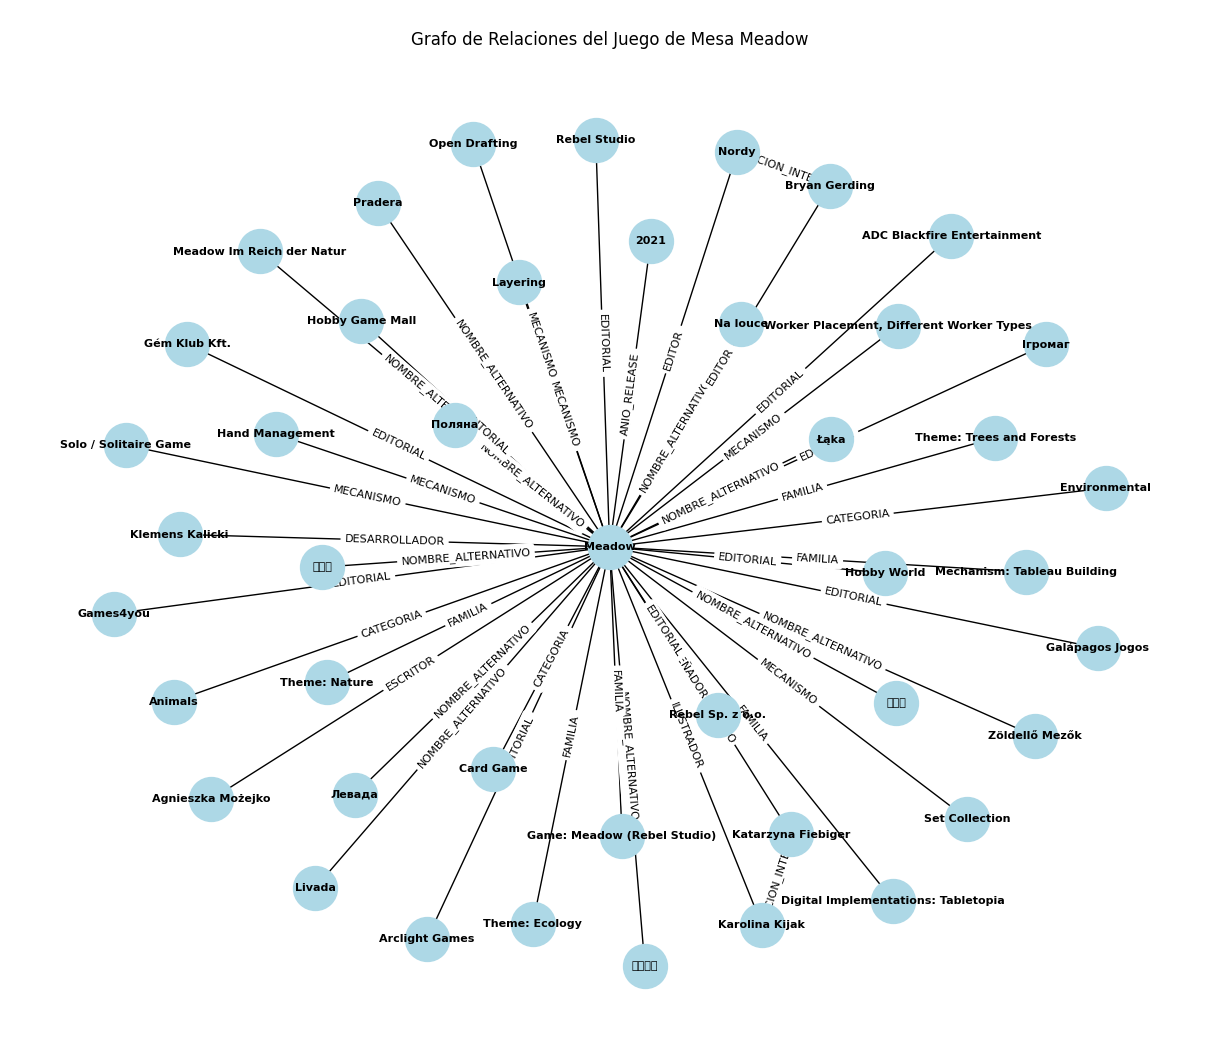

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

import pydot
from networkx.drawing.nx_pydot import to_pydot

def crear_grafo(lista_de_relaciones):
    grafo = nx.Graph() # Usamos Graph para representar relaciones(sujeto1 -- relacion -- sujeto2)
    for nodo1, relacion, nodo2 in lista_de_relaciones:
        grafo.add_edge(nodo1, nodo2, relation=relacion)
    return grafo

def visualizar_grafo(grafo):
    plt.figure(figsize=(12, 10))
    pos = nx.spring_layout(grafo, seed= 42) # Define el layout para la visualización
    edge_labels = nx.get_edge_attributes(grafo, 'relation') # Etiquetas para las aristas
    nx.draw(grafo, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=8, font_weight='bold', arrowsize=10)
    nx.draw_networkx_edge_labels(grafo, pos, edge_labels=edge_labels, font_size=8)
    plt.title("\nGrafo de Relaciones del Juego de Mesa Meadow")
    plt.show()

grafo_juegos = crear_grafo(relaciones)

# Vemos los elementos del grafo
print("Nodos del grafo:", grafo_juegos.nodes())
print("Aristas del grafo:", grafo_juegos.edges(data=True))

# Visualizar el grafo
visualizar_grafo(grafo_juegos)


# Manual de instrucciones (en español)

In [ ]:
!pip install tika

In [ ]:
from tika import parser
# CARGAMOS PREVIAMENTE AL ENTORNO EL ARCHIVO PDF CORRESPONDIENTE
# Parseamos el PDF
archivo = "Pradera_Reglamento_(Spanish).pdf"
raw = parser.from_file(archivo)

# Accedemos al contenido de texto
texto_es = raw['content']

# Mostramos el texto (una parte para no saturar)
print(texto_es[:5000])  # Muestra los primeros 5000 caracteres





































Instrukcja

Nie musisz czytać tej 
instrukcji, obejrzyj 
film prezentujący 

zasady.

Reglamento ¿No te apetece leer las reglas? 
Escanea el código QR para 

ver un videotutorial.

RBME01ES_Rulebook_AMS.indd   1RBME01ES_Rulebook_AMS.indd   1 04/03/2021   12:59:4704/03/2021   12:59:47



3

Del autor
Me gustaría dar las gracias a todos los probadores del 
juego y colegas de Rebel Studio: sin vuestra participación, 
paciencia y amabilidad mi simple prototipo nunca se 
habría convertido en un juego de verdad.

Mi hijo Wojciech me acompañó en todas las etapas 
del desarrollo de Pradera. Su entusiasmo, su fe inquebrantable y su voluntad para ayudar (así como 
convencerme de ir a pasear por los bosques y prados circundantes) fueron el mejor apoyo en los momentos 
de duda. ¡Muchas gracias por todo lo que hiciste por mí!

En Pradera los jugadores se convierten en espectadores de la naturaleza, donde los animales y las plantas 
protagonizan historias de lo má

In [ ]:
# SCRIPT PARA GUARDAR EL "REGLAMENTO EN ESPAÑOL" DEL JUEGO EN ARCHIVO .TXT
import os

from google.colab import drive
drive.mount('/content/drive/')

# Nombre del archivo para guardar los enlaces
nombre_archivo = 'reglamento_español.txt'

# Acceso a la carpeta compartida en MyDrive
directorio_guardado = f'/content/drive/My Drive/PRADERA/datos/informacion'

# Construir la ruta completa del archivo
ruta_completa = os.path.join(directorio_guardado, nombre_archivo)

# Abrir el archivo en modo escritura
with open(ruta_completa, 'w', encoding='utf-8') as archivo:
      archivo.write(f"{texto_es}")

print(f"\nReglamento en Español guardado en {ruta_completa}")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).

Reglamento en Español guardado en /content/drive/My Drive/PRADERA/datos/informacion/reglamento_español.txt


# Manual de instrucciones (en ingles)

In [ ]:
from tika import parser
# CARGAMOS PREVIAMENTE AL ENTORNO EL ARCHIVO PDF CORRESPONDIENTE
# Parseamos el PDF
archivo = "Meadow_EN_rulebook.pdf"
raw = parser.from_file(archivo)

# Accedemos al contenido de texto
texto_eng = raw['content']

# Mostramos el texto (una parte para no saturar)
print(texto_eng[:5000])  # Muestra los primeros 2000 caracteres





































Instrukcja

Nie musisz czytać tej 
instrukcji, obejrzyj 
film prezentujący 

zasady.

Rulebook Don’t want to read the rules? 
Scan the QR code to watch 

 a video tutorial.



3

From the Designer
I’d like to greatly thank all the testers and colleagues  
from Rebel studio – without your involvement, patience 
and kindness my simple prototype would have never  
become a real game.

My son Wojciech accompanied me on all of the stages of 
development of Meadow. His enthusiasm, unwavering faith and willingness to help (as well as convincing 
me to go on walks in surrounding forests and meadows) were the best support in the moments of doubt. 
Thanks a lot for all you did for me!

In Meadow, players are wanderers observing nature, home to the most interesting stories, where animals 
and plants are the main actors. Equipped with a map, players wander a picturesque landscape, searching 
for inspiration among the breathtaking sights. They are led by their pa

In [ ]:
# SCRIPT PARA GUARDAR EL "REGLAMENTO EN INGLES" DEL JUEGO EN ARCHIVO .TXT
import os

from google.colab import drive
drive.mount('/content/drive/')

# Nombre del archivo para guardar los enlaces
nombre_archivo = 'reglamento_ingles.txt'

# Acceso a la carpeta compartida en MyDrive
directorio_guardado = f'/content/drive/My Drive/PRADERA/datos/informacion'

# Construir la ruta completa del archivo
ruta_completa = os.path.join(directorio_guardado, nombre_archivo)

# Abrir el archivo en modo escritura
with open(ruta_completa, 'w', encoding='utf-8') as archivo:
      archivo.write(f"{texto_eng}")

print(f"\nReglamento en Ingles guardado en {ruta_completa}")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).

Reglamento en Ingles guardado en /content/drive/My Drive/PRADERA/datos/informacion/reglamento_ingles.txt


# Análisis post-extracción

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import numpy as np

# Ruta de la carpeta donde están los archivos .txt
ruta_carpeta = '/content/drive/My Drive/PRADERA/datos/informacion/'
# Busca todos los archivos .txt en la ruta especificada y devuelve una lista con su ruta completa
archivos_txt = glob.glob(os.path.join(ruta_carpeta, '*.txt'))

# Listas para almacenar métricas
longitudes_caracteres = []
longitudes_palabras = []

for archivo in archivos_txt:
    with open(archivo, 'r', encoding='utf-8') as f:
        texto = f.read()
        # contar caracteres
        longitudes_caracteres.append(len(texto))
        # contar palabras
        palabras = texto.split()
        longitudes_palabras.append(len(palabras))

# Resumen estadístico
print("Resumen de los archivos de texto:")
print(f"Cantidad total de archivos: {len(archivos_txt)}")
print(f"Total de caracteres acumulados: {np.sum(longitudes_caracteres)}")
print(f"Promedio de caracteres por archivo: {np.mean(longitudes_caracteres):.2f}")
print(f"Máximo de caracteres en un archivo: {np.max(longitudes_caracteres)}")
print(f"Mínimo de caracteres en un archivo: {np.min(longitudes_caracteres)}")
print()
print(f"Total de palabras acumuladas: {np.sum(longitudes_palabras)}")
print(f"Promedio de palabras por archivo: {np.mean(longitudes_palabras):.2f}")
print(f"Máximo de palabras en un archivo: {np.max(longitudes_palabras)}")
print(f"Mínimo de palabras en un archivo: {np.min(longitudes_palabras)}")


Resumen de los archivos de texto:
Cantidad total de archivos: 15
Total de caracteres acumulados: 609279
Promedio de caracteres por archivo: 40618.60
Máximo de caracteres en un archivo: 202239
Mínimo de caracteres en un archivo: 462

Total de palabras acumuladas: 109757
Promedio de palabras por archivo: 7317.13
Máximo de palabras en un archivo: 35991
Mínimo de palabras en un archivo: 18


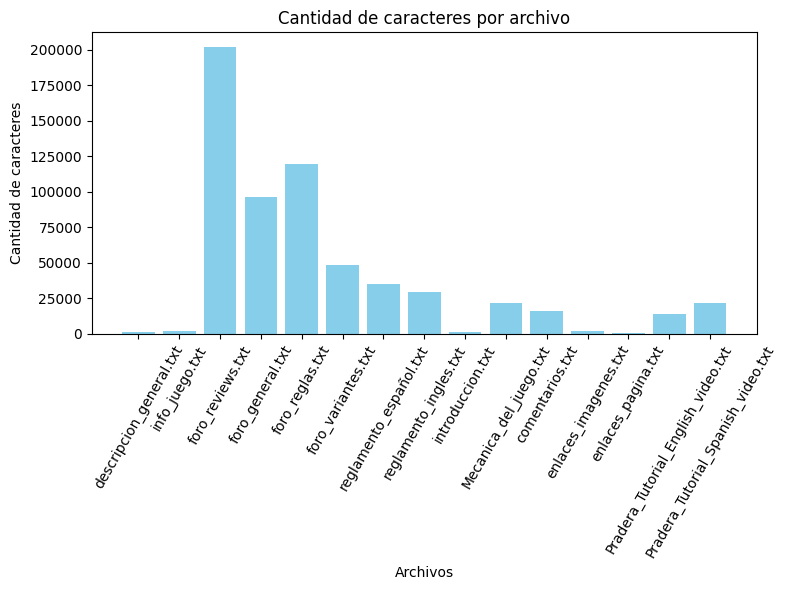

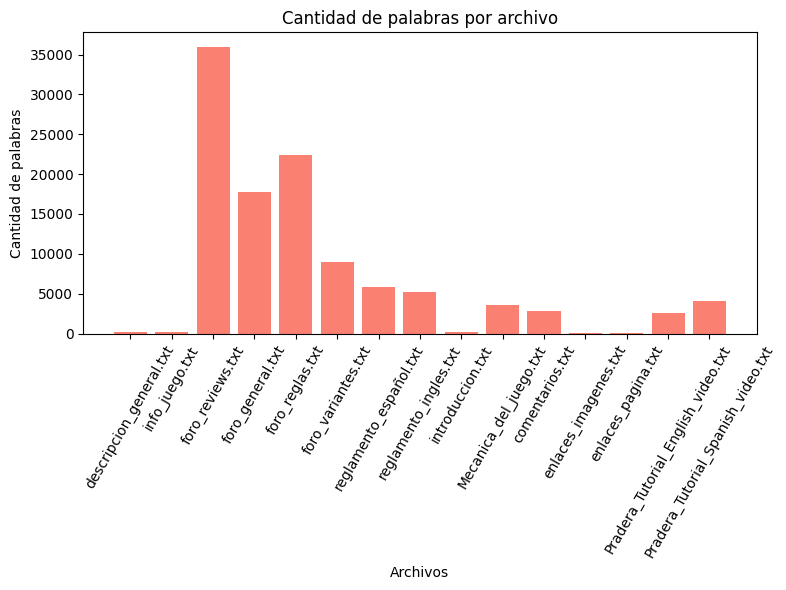

In [ ]:
# Gráficas
# Lista de nombres de archivos para etiquetar en eje x
nombres_archivos = [os.path.basename(archivo) for archivo in archivos_txt]

# Gráfico de caracteres por archivo
plt.figure(figsize=(8, 6))
plt.bar(nombres_archivos, longitudes_caracteres, color='skyblue')
plt.xlabel('Archivos')
plt.ylabel('Cantidad de caracteres')
plt.title('Cantidad de caracteres por archivo')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

# Gráfico de palabras por archivo
plt.figure(figsize=(8, 6))
plt.bar(nombres_archivos, longitudes_palabras, color='salmon')
plt.xlabel('Archivos')
plt.ylabel('Cantidad de palabras')
plt.title('Cantidad de palabras por archivo')
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

In [ ]:
import os
import glob
import pandas as pd

# Rutas de las carpetas
rutas = [
    '/content/drive/My Drive/PRADERA/datos/informacion/',
    '/content/drive/My Drive/PRADERA/datos/estadisticas/',
    '/content/drive/My Drive/PRADERA/datos/relaciones/'
]

# Buscar todos los archivos .txt en esas rutas
archivos_ = []
for ruta in rutas:
    archivos_.extend(glob.glob(os.path.join(ruta, '*.*')))

# Lista de categorías manualmente definida en orden
categorias = [
    'REGLAMENTO/MANUAL', 'REGLAMENTO/MANUAL', 'TUTORIAL', 'TUTORIAL', 'DESCRIPCION GRAL', 'INFORMACION',
    'FORO/RESEÑA', 'FORO/RESEÑA', 'FORO/RESEÑA', 'FORO/RESEÑA', 'DESCRIPCION GRAL', 'INFORMACION',
    'FORO/RESEÑA', 'LINKS', 'LINKS', 'TABULAR', 'TABULAR']

# Crear DataFrame directamente
df = pd.DataFrame({
    'NOMBRE_ARCHIVO': [os.path.basename(path) for path in archivos_],
    'CATEGORIA': categorias
})

# Resumen de cantidad por categoría
resumen = df['CATEGORIA'].value_counts()

print("Cantidad de archivos por categoría:")
print(resumen)


Cantidad de archivos por categoría:
CATEGORIA
FORO/RESEÑA          5
TUTORIAL             2
REGLAMENTO/MANUAL    2
DESCRIPCION GRAL     2
INFORMACION          2
LINKS                2
TABULAR              2
Name: count, dtype: int64
